# KNN classifier

In [15]:
import pandas as pd

df = pd.read_csv('dataset.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
validation_df = pd.read_csv('validation.csv')

## Split the features and the target column and normalize the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# full dataset
X = df.drop('Class', axis=1)
y = df['Class']

# splits
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_validation = validation_df.drop('Class', axis=1)
y_validation = validation_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

## Experiment with parameters (find optimal k)

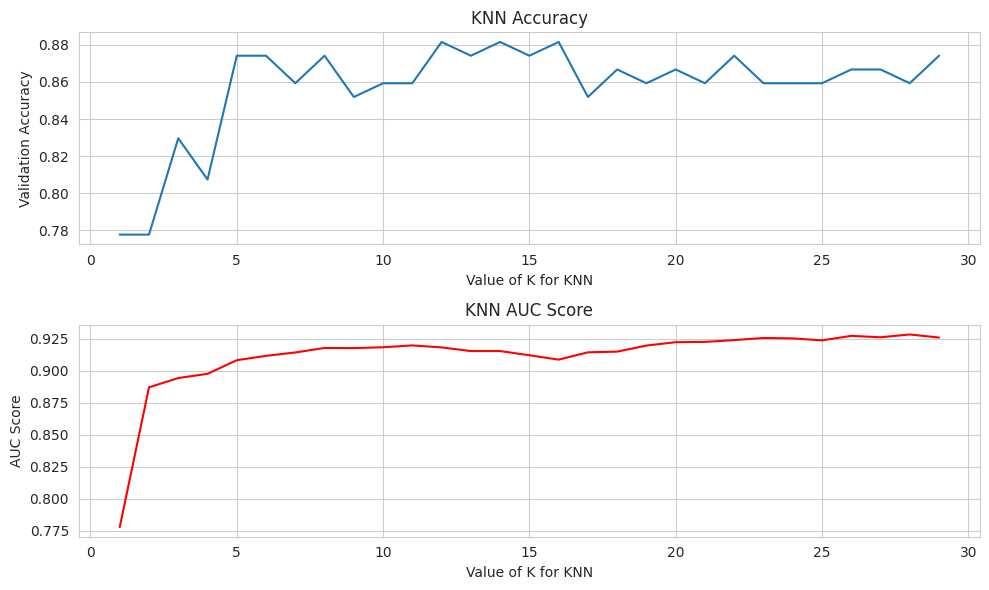

In [17]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

validation_scores = []
auc_scores = []

k_values = range(1, 30)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    y_pred = knn.predict(X_validation)
    y_pred_prob = knn.predict_proba(X_validation)[:, 1]

    accuracy = accuracy_score(y_validation, y_pred)
    auc = roc_auc_score(y_validation, y_pred_prob)

    validation_scores.append(accuracy)
    auc_scores.append(auc)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(k_values, validation_scores, label='Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Accuracy')
plt.title('KNN Accuracy')

plt.subplot(2, 1, 2)
plt.plot(k_values, auc_scores, label='AUC', color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('AUC Score')
plt.title('KNN AUC Score')

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


def get_result_stats(clf, X, y, pos_label="Kecimen"):
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)[:, 1]

    conf_matrix = confusion_matrix(y, y_pred, labels=["Kecimen", "Besni"])
    acc = accuracy_score(y, y_pred)
    auc_score = roc_auc_score(y, y_prob)
    precision = precision_score(y, y_pred, pos_label=pos_label)
    recall = recall_score(y, y_pred, pos_label=pos_label)
    f1 = f1_score(y, y_pred, pos_label=pos_label)

    return y_pred, acc, auc_score, precision, recall, f1, conf_matrix


dtype = {"K": int, "Accuracy": float, "AUC": float, "Precision": float, "Recall": float, "F1 Score": float}
results_df = pd.DataFrame(columns=["K", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"]).astype(dtype)
wrong_predictions = set()
for val in [3, 10, 20]:
    clf = KNeighborsClassifier(n_neighbors=val).fit(X_train, y_train)
    y_pred, acc, auc_score, precision, recall, f1, conf_matrix = get_result_stats(clf, X_test, y_test)

    df_conf_matrix = pd.DataFrame(conf_matrix, index=["Actual Kecimen", "Actual Besni"],
                                  columns=["Predicted Kecimen", "Predicted Besni"])
    display(df_conf_matrix)

    temp_df = pd.DataFrame([[val, acc, auc_score, precision, recall, f1]],
                           columns=["K", "Accuracy", "AUC", "Precision", "Recall", "F1 Score"]).astype(dtype)
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

    for i, (actual, predicted) in enumerate(zip(y_test, y_pred)):
        if actual != predicted:
            wrong_predictions.add(i)

results_df.to_latex(
    f"./knn-scores.tex",
    float_format="%.3f",
    caption=f"Apskaičiuoti matai",
    label=f"tab:knn-scores",
    escape=True,
    bold_rows=True,
)

display(results_df)


,Predicted Kecimen,Predicted Besni
Actual Kecimen,61,11
Actual Besni,10,53


,Predicted Kecimen,Predicted Besni
Actual Kecimen,57,15
Actual Besni,9,54


,Predicted Kecimen,Predicted Besni
Actual Kecimen,57,15
Actual Besni,9,54


,K,Accuracy,AUC,Precision,Recall,F1 Score
0,3,0.844444,0.868056,0.859155,0.847222,0.853147
1,10,0.822222,0.880952,0.863636,0.791667,0.826087
2,20,0.822222,0.905093,0.863636,0.791667,0.826087


In [19]:
def display_stats_tables_by_class(df: pd.DataFrame, label: str):
    rename_map = {
        "mean": "Mean",
        "std": "Std",
        "min": "Min",
        "50%": "Med",
        "25%": "1Q",
        "75%": "3Q",
        "max": "Max",
        "count": "Count"
    }

    for cn in ["Kecimen", "Besni"]:
        stat_df = (
            df.loc[df["Class"] == cn].describe().T.rename(columns=rename_map).T
        )

        stat_df.to_latex(
            f"./stat-{cn.lower()}-knn.tex",
            float_format="%.3f",
            caption=f"Klasės {cn} aprašomoji statistika",
            label=f"tab:knn-{label}-{cn.lower()}",
            escape=True,
            bold_rows=True,
        )

        print(f"Klasės {cn} aprašomoji statistika")
        display(stat_df)


display_stats_tables_by_class(df=test_df.loc[list(wrong_predictions)], label="stat-wrong")


Klasės Kecimen aprašomoji statistika


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,16.000000,16.000000,16.000000,16.000000,16.000000
Mean,0.305925,0.279186,0.334251,0.743985,0.267202
Std,0.065265,0.023413,0.089491,0.066965,0.034096
Min,0.178613,0.242499,0.136156,0.646207,0.192179
1Q,0.258839,0.261410,0.257773,0.704695,0.249912
Med,0.304793,0.277319,0.345658,0.735373,0.268970
3Q,0.349264,0.295480,0.386589,0.790243,0.287675
Max,0.410488,0.327451,0.468172,0.884131,0.326705


Klasės Besni aprašomoji statistika


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Perimeter
Count,11.000000,11.000000,11.000000,11.000000,11.000000
Mean,0.214746,0.199874,0.270287,0.688875,0.206027
Std,0.064820,0.050503,0.082078,0.110460,0.042453
Min,0.115921,0.110661,0.130681,0.445900,0.144488
1Q,0.163763,0.169117,0.204864,0.652913,0.177404
Med,0.211576,0.189285,0.286218,0.732514,0.208055
3Q,0.264967,0.233645,0.327055,0.765399,0.235235
Max,0.318296,0.267516,0.378638,0.804109,0.276503
